# PRÁCTICO N° 3 : Bases de Datos #
## Tapia Martina ##
## Actividad 2 ##

En esta actividad lo que se busca es estudiar la distribución de tipos morfológicos y determinar si la misma es consistente con una distribución uniforme. Es decir, se busca verificar si los las galaxias elípticas y espirales son igualmente probables de encontrar o no. 

In [2]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns          
sns.set()         
import scipy.stats

In [3]:
data = np.genfromtxt('muestra1_MartinaTapia.csv',delimiter=',', skip_header = 1)

In [4]:
#Se analiza cuales son las filas que tienen en la columna 1 (spiral) un 1 
fes = np.where(data[:,1]==1)[0]   
sp = data[fes, :]

In [5]:
# Se realiza el mismo procedimiento anterior para las galaxias elípticas 
feli = np.where(data[:,2]==1)[0]
elip = data[feli, :]

### Método Chi-cuadrado ###  

El método Chi-cuadrado, es considerado como una prueba no paramétrica que mide la discrepancia entre una distribución observada y otra teórica, indicando en qué medida las diferencias existentes entre ambas, de haberlas, se deben al azar en la Prueba de Hipótesis (PH). En particular, el método de Chi-cuadrado compara histogramas con distribuciones de probabilidad discretas. El método también funciona para funciones de distribución discretizadas, donde las probabilidades se obtienen integrando las funciones distribución sobre los diferentes bines.  
El método tiene dos variantes:  

- Para comparar un histograma con una función de probabilidad acumulada discretizada. Donde la hipótesis nula $H_{0}$ es la muestra sigue la distribución de probabilidades dada.  

- Para comparar dos histogramas obtenidos de dos muestras diferentes. Donde la hipótesis nula $H_{0}$ es las dos muestras siguen la misma distribución.  

En el caso de la actividad a realizar, se prenseta el primer caso. Ya que se busca estudiar la distribución de tipos morfológicos de galaxias y determinar si la misma es consistente con una distribución uniforme.  

El estadístico de prueba chi- cuadrado es:  

$$ \chi^2 = \sum_{i=1} \frac{(frecuencia_{observada,i}-frecuancia_{teórica,i})^2}{frecuencia_[teorica} $$    

Notar que, cuanto mayor sea el valor de $ \chi^2$, menos verosímil es que la hipótesis sea correcta. De la misma forma, cuanto más se aproxima a cero el valor de chi-cuadrado, más ajustadas están ambas distribuciones.  
Los grados de libertad $\nu$ vienen dados por $ \nu = N − 1 $ donde N es el número de bines.  

Las tablas de la distribución acumulada de la función distribución relacionada con este estadístico es la que se usa para hacer las estimas necesarias en el método chi-cuadrado. En consecuencia, se acepta $H_{0}$ cuando $ \chi^2 < \chi^2_{(1−\alpha,\nu)}$ En caso contrario se rechaza.  
Observar que $\alpha$  representa el nivel de significación estadística elegido.  

A continuacion se aplicará el método desarrollado en el caso de estudio.

### Aplicación del Método Chi-cuadrado ###

Primero se plantearán las hipótesis;

$ H_{0}: $ Tanto las galaxias elípticas como las espirales son igual de probables de encontrar en el universo.  

$ H_{a}: $ Son diferentes las probabilidades de encontrar galaxias elípticas de las probabilidades de hallar espirales.  

Luego, se determina el Nivel de significación o confianza para realizar la prueba: $\alpha =$ 0,05  

- Zona de aceptación: son todos los valores de $\chi^2 < \chi_c $
- Zona de rechazo: son todos los valores de $\chi^2 > \chi_c $

Para la aplicación de la prueba estadística se realizarán los histogramas correspondientes a las ditribuciones y además se creará una función que calcule el estadístico de prueba chi-cuadrado y de ésta forma poder comparar los valores y concluir.  

A continuación se realizarán los cálculos: 

In [6]:
sp = data[:, 1]
elip = data[:, 2]

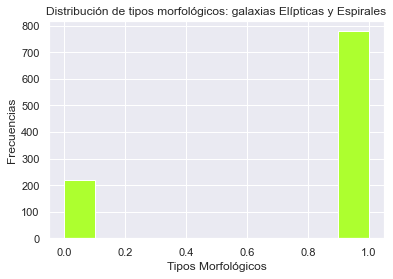

In [40]:
#Se grafica la distribución observada de los datos de tabla

plt.title('Distribución de tipos morfológicos: galaxias Elípticas y Espirales')
plt.xlabel('Tipos Morfológicos')
plt.ylabel('Frecuencias')
obs = plt.hist(sp, color = 'greenyellow')
plt.show()

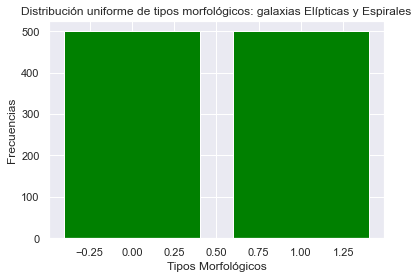

In [39]:
# Se crea una distribución uniforme de tipos morfológicos

plt.title('Distribución uniforme de tipos morfológicos: galaxias Elípticas y Espirales')
plt.xlabel('Tipos Morfológicos')
plt.ylabel('Frecuencias')
hu = plt.bar([0,1],[500,500], color = 'green')
plt.show()

In [41]:
a = 0.05  #Nivel de significación 
P = 1 - a  #Probabilidad
gl = 2 #Grados de libertad
chic = 5.99  #Dato de tabla (Libro: Zandivarez, 'Principios básicos de probabilidad y estadística')

In [42]:
obs[0]

array([221.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 779.])

In [43]:
#Frecuencias absolutas 
fobs = [779,221]
fteo = [500,500]

In [44]:
#Se crea la función que clacula el estimador

def chicuadrado():
    chi=0
    chi1 = []
    for i in range(len(fobs)):
        a = (fobs[i] - fteo[i])**2
        b = fteo[i]
        chi = a / b
        chi1.append(chi)
    chi2 = sum(chi1)
    return(chi2)

In [45]:
chi = chicuadrado()
chi

311.364

In [29]:
# Se comparan los valores de chi

chi > chic

True

### Conclusiones ###
Finalmente se verifica que el valor de chi obserbado, es menor que el estimador chi crítico obtenido de tabla en relación a $\alpha$. Es decir que se rechaza la $H_{0}$ a favor de la $H_{a}$.  
Con esta prueba se verifica que las galaxias elipticas y espirales no son igualmente probables de observar, con un nivel de confianza del 95%.  
Además, se puede ver del histograma que las galaxias espirales son más probables de encontrar en una muestra de 1000 que las galaxias elípticas. 
